# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [75]:
import pandas as pd
from scipy import stats as st
import numpy as np

In [76]:
vgsales = pd.read_csv('vgsales.csv')

### Посмотрим общую информацию о датасете:

In [77]:
vgsales.head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
vgsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [79]:
vgsales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


In [80]:
vgsales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [81]:
vgsales['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

### 1) Как критики относятся к спортивным играм?

In [82]:
vgsales_sports = vgsales.copy()
vgsales_sports = vgsales_sports[vgsales_sports['Genre'] == 'Sports']
#vgsales_sports = vgsales_sports.dropna(subset = {'Critic_Score','User_Score'})
vgsales_sports = vgsales_sports['Critic_Score'].dropna()

In [83]:
 vgsales_sports.describe()

count    1194.000000
mean       71.968174
std        13.878433
min        19.000000
25%        64.000000
50%        75.000000
75%        82.000000
max        98.000000
Name: Critic_Score, dtype: float64

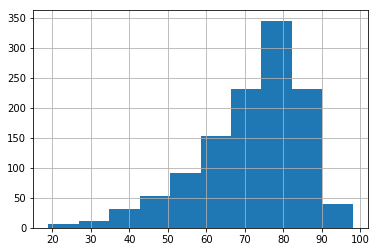

In [84]:
vgsales_sports.hist()

Как критики относятся к спортивным играм?  
Предположим, что критики высоко оценивают спортивые игры - оценка выше 80%.  
Н0: В среднем оценка критиков <= 80%  
Н1: В среднем оценка критиков > 80%  

Установим уровень значимости alpha = 0.05  

In [90]:
stat_score = 80

In [91]:
alpha = 0.05

In [95]:
print('Среднее значение оценки критиков (mean) = ' ,format(vgsales_sports.mean(), '.2f'))

Среднее значение оценки критиков (mean) =  71.97


In [96]:
res = st.ttest_1samp(vgsales_sports, stat_score, alternative='greater')

In [97]:
if (res.pvalue < alpha):
    print(f'Нулевая гипотеза не верна. Средняя оценка критиков выше {stat_score}%')
else:
    print(f'Нулевая гипотеза верна. Средняя оценка критиков не выше {stat_score}%')  

Нулевая гипотеза верна. Средняя оценка критиков не выше 80%


### 2) Критикам нравятся больше игры на PC или на PS4?

In [168]:
# Посмотрим, данные по каким платформам есть в датасете:
vgsales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [169]:
vgsales_pc_critics = vgsales[(vgsales['Platform'] == 'PC')]['Critic_Score']
vgsales_pc_critics = vgsales_pc_critics.dropna()
vgsales_ps4_critics = vgsales[(vgsales['Platform'] == 'PS4')]['Critic_Score']
vgsales_ps4_critics = vgsales_ps4_critics.dropna()

Критикам нравятся больше игры на PC или на PS4?  
Предположим, что средние оценки критиков для PC и PS4 разные.  
Н0: В среднем оценки критиков не отличаются   
Н1: В среднем оценки критиков отличаются    
Установим уровень значимости alpha = 0.05  

In [170]:
alpha = 0.05

In [171]:
print('Среднее значение оценки критиков для PC (mean) = ' ,format(vgsales_pc_critics.mean(), '.2f'))
print('Среднее значение оценки критиков для PS4 (mean) = ' ,format(vgsales_ps4_critics.mean(), '.2f'))

Среднее значение оценки критиков для PC (mean) =  75.93
Среднее значение оценки критиков для PS4 (mean) =  72.09


In [172]:
res = st.ttest_ind(vgsales_pc_critics,vgsales_ps4_critics,equal_var=False)

In [173]:
if (res.pvalue < alpha):
    print(f'Нулевая гипотеза не верна. В среднем оценки критиков отличаются')
else:
    print(f'Нулевая гипотеза верна. В среднем оценки критиков не отличаются')  

Нулевая гипотеза не верна. В среднем оценки критиков отличаются


In [174]:
res

Ttest_indResult(statistic=4.3087588262138725, pvalue=2.067249157283479e-05)

### 3) Критикам больше нравятся стрелялки или стратегии?

In [175]:
vgsales_shooter_critics = vgsales[(vgsales['Genre'] == 'Shooter')]['Critic_Score']
vgsales_shooter_critics = vgsales_shooter_critics.dropna()
vgsales_strategy_critics = vgsales[(vgsales['Genre'] == 'Strategy')]['Critic_Score']
vgsales_strategy_critics = vgsales_strategy_critics.dropna()

Критикам нравятся больше стратегии или стрелялки?  
Предположим, что средние оценки критиков для стратегий и стрелялок разные.  
Н0: В среднем оценки критиков не отличаются   
Н1: В среднем оценки критиков отличаются    
Установим уровень значимости alpha = 0.01  

In [176]:
alpha = 0.01

In [177]:
print('Среднее значение оценки критиков для стрелялок = ' ,format(vgsales_shooter_critics.mean(), '.2f'))
print('Среднее значение оценки критиков для стратегий = ' ,format(vgsales_strategy_critics.mean(), '.2f'))

Среднее значение оценки критиков для стрелялок =  70.18
Среднее значение оценки критиков для стратегий =  72.09


In [178]:
res = st.ttest_ind(vgsales_shooter_critics,vgsales_strategy_critics,equal_var=False)

In [179]:
if (res.pvalue < alpha):
    print(f'Нулевая гипотеза не верна. В среднем оценки критиков отличаются')
else:
    print(f'Нулевая гипотеза верна. В среднем оценки критиков не отличаются')  

Нулевая гипотеза верна. В среднем оценки критиков не отличаются


In [180]:
res

Ttest_indResult(statistic=-2.2972408230640315, pvalue=0.021938989522304823)

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Привидите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Привидите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [263]:
#data_file = 'https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv'

In [264]:
data = pd.read_csv('spam.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### 1) Приведем весь текст к нижнему регистру

In [265]:
data.columns = data.columns.str.lower()
data['message'] = data['message'].str.lower()

In [266]:
data.head()

,category,message
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


### 2) Удалим мусорные символы

In [267]:
# Оставим только буквы, цифры и пробелы

In [268]:
data['message'] = data['message'].apply(lambda x: re.sub('[\W_]+',' ', x))

In [269]:
data.head()

,category,message
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives arou...


### 3) Удалим стоп-слова

In [270]:
import nltk

In [271]:
# разделим строки на слова:
data['words'] = data['message'].apply(lambda x: x.split())
data.head(3)

,category,message,words
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."


In [272]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
data['clean_words'] = data['words'].apply(lambda x: [word for word in x if word not in stop_words])
data.head(3)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/polinalatypova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,category,message,words,clean_words
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."


In [273]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/polinalatypova/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4) Приведем все слова к нормальной форме

In [274]:
nltk.download('wordnet')
wordnetlemmatizer = nltk.stem.WordNetLemmatizer()
data['normalized'] = data['clean_words'].apply(lambda x: [wordnetlemmatizer.lemmatize(word) for word in x] )
data.head(3)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/polinalatypova/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,category,message,words,clean_words,normalized
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar joking wif u oni,"[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]","[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, 2, wkly, comp, win, fa, cup, fin...","[free, entry, 2, wkly, comp, win, fa, cup, fin..."


### 5) Преобразуем все сообщения в вектора TF-IDF:

In [278]:
data['final_message'] = data['normalized'].apply(lambda x: " ".join(str(word) for word in x))

In [280]:
data.head(1)

,category,message,words,clean_words,normalized,final_message
0,ham,go until jurong point crazy available only in ...,"[go, until, jurong, point, crazy, available, o...","[go, jurong, point, crazy, available, bugis, n...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazy available bugis n great ...


In [282]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(data['final_message'] )
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [283]:
tfidf_matrix.shape

(5572, 8048)

### 6) Разделим данные на тестовые и тренировочные в соотношении 30/70, укажем random_state=42. Используем train_test_split:


In [288]:
from sklearn.model_selection import train_test_split

In [289]:
X_train, X_test, y_train, X_test = train_test_split(tfidf_matrix, data['category'], test_size=0.30, random_state=42)


In [323]:
data['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

### 7) Построим модель логистической регрессии, укажем random_state=42, оценим ее точность на тестовых данных

In [317]:
from sklearn.linear_model import LogisticRegression

In [318]:
logreg = LogisticRegression(random_state=42).fit(X_train, y_train)

In [319]:
# Точность на тестовых данных:
print(f'Точность на тестовых данных: {logreg.score(X_test, y_test)}')

Точность на тестовых данных: 0.958732057416268


### 8) Опишем результаты при помощи confusion_matrix:

In [320]:
from sklearn.metrics import confusion_matrix

In [321]:
confusion_matrix(y_test, logreg.predict(X_test))

array([[1445,    3],
       [  66,  158]])

Правильно выполнено предсказание для 1445 строк категории 'ham' и 158 - для 'spam'.  
Ошибочная классификация: 66 для 'ham' , 3 для 'spam'.  

### 9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).


In [362]:
data_classified = data.copy()
data_classified = data_classified[data_classified.index.isin(y_test.index)]
data_classified['predicted_class'] = pd.Series(logreg.predict(X_test))
data_classified = data_classified[data_classified['predicted_class']!=data_classified['category']]

In [363]:
data_classified = data_classified.drop(columns = {'message', 'words', 'clean_words', 'normalized'})

In [364]:
data_classified.head(10)

,category,final_message,predicted_class
8,spam,winner valued network customer selected receiv...,ham
12,spam,urgent 1 week free membership 100 000 prize ja...,ham
15,spam,xxxmobilemovieclub use credit click wap link n...,ham
17,ham,eh u remember 2 spell name yes v naughty make ...,spam
19,spam,england v macedonia dont miss goal team news t...,ham
51,ham,gram usually run like lt gt half eighth smarte...,spam
62,ham,part checking iq,spam
65,spam,valued customer pleased advise following recen...,ham
68,spam,hear new divorce barbie come ken stuff,ham
70,ham,wah lucky man save money hee,spam


#### ПРИМЕЧАНИЕ
Домашнее задание сдается ссылкой [Google Colab](https://colab.research.google.com/).
Не сможем проверить или помочь, если вы пришлете:
- файлы;
- архивы;
- скриншоты кода.

Все обсуждения и консультации по выполнению домашнего задания ведутся только на соответствующем канале в slack.

##### Как правильно задавать вопросы аспирантам, преподавателям и коллегам?
Прежде чем задать вопрос необходимо попробовать найти ответ самому в интернете. Навык самостоятельного поиска информации – один из важнейших, и каждый практикующий специалист любого уровня это делает каждый день.

Любой вопрос должен быть сформулирован по алгоритму:  
1) Что я делаю?  
2) Какого результата я ожидаю?  
3) Как фактический результат отличается от ожидаемого?  
4) Что я уже попробовал сделать, чтобы исправить проблему?  

По возможности, прикрепляйте к вопросу скриншоты, либо ссылки на код. Оставляйте только проблемный и воспроизводимый участок кода, все решение выкладывать не допускается.
